In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score,\
                            recall_score, f1_score, confusion_matrix
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [2]:
data = load_iris()
X = pd.DataFrame({'sepal_length': data.data[:,0], 'sepal_width': data.data[:,1], 'petal_length': data.data[:,2], 'petal_width': data.data[:,3]})
# dX = pd.DataFrame(data=X)
y =  pd.DataFrame({'Species': data.target})

frames = [X, y]
df = pd.concat(frames, axis=1)
df

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
#PROBLEM1
new_df = df[(df['Species'] == 1) | (df['Species'] == 2)][['sepal_length', 'petal_length','Species']]
new_df

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [4]:
def plotViolin(data, title):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.set_title('Sepal length')
    ax1.violinplot(data.iloc[:, 0])

    ax2.set_title('Petal length')
    ax2.violinplot(data.iloc[:, 1])
    
    fig.suptitle(title)
    plt.show()

def plotBox(data, title):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.set_title('Sepal length')
    ax1.boxplot(data.iloc[:, 0])

    ax2.set_title('Petal length')
    ax2.boxplot(data.iloc[:, 1])
    
    fig.suptitle(title)
    plt.show()

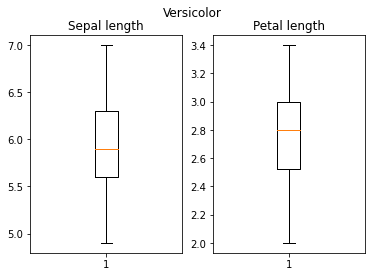

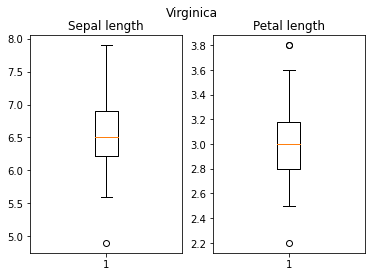

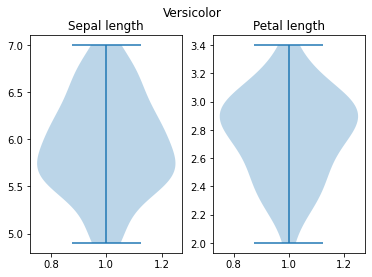

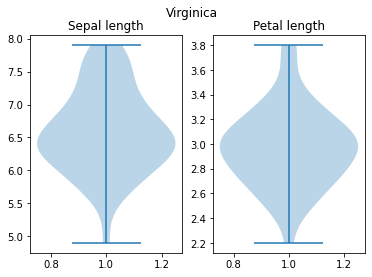

In [5]:
#PROBLEM2
plotBox(df.loc[df['Species'] == 1], 'Versicolor')
plotBox(df.loc[df['Species'] == 2], 'Virginica')
plotViolin(df.loc[df['Species'] == 1], 'Versicolor')
plotViolin(df.loc[df['Species'] == 2], 'Virginica')

In [42]:
#PROBLEM3
train, test = train_test_split(new_df.to_numpy())

In [43]:
#PROBLEM4
scaler = StandardScaler()
scaler.fit(train[:, :-1])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [44]:
scaler.mean_

array([6.26266667, 4.90533333])

In [45]:
X_train = scaler.transform(train[:, :-1])
X_train

array([[-0.40858884,  0.24628103],
       [-0.09748059, -0.7658328 ],
       [ 0.68029006,  1.00536641],
       [ 0.99139831, -0.00674743],
       [ 0.99139831,  1.00536641],
       [ 0.83584418, -0.13326166],
       [ 0.68029006, -0.25977588],
       [-0.87525123, -0.51280434],
       [ 0.05807354,  0.24628103],
       [-0.56414297, -0.89234703],
       [ 0.83584418,  0.75233795],
       [-0.40858884, -0.13326166],
       [-0.09748059, -0.13326166],
       [ 0.68029006,  1.13188064],
       [-0.87525123, -0.89234703],
       [ 2.23583134,  2.52353717],
       [-2.11968426, -0.51280434],
       [ 1.4580607 ,  1.13188064],
       [-0.25303472, -0.00674743],
       [-0.25303472,  0.87885218],
       [-1.03080536, -1.27188972],
       [ 0.21362767,  0.75233795],
       [ 0.05807354,  0.87885218],
       [ 0.05807354, -0.00674743],
       [-0.87525123, -1.77794664],
       [ 1.14695244, -0.25977588],
       [ 0.99139831,  0.24628103],
       [-1.18635949, -0.63931857],
       [-1.18635949,

In [46]:
X_test = scaler.transform(test[:, :-1])
X_test

array([[-0.09748059,  0.62582372],
       [-0.25303472, -0.38629011],
       [-0.7196971 , -1.01886126],
       [-0.09748059, -0.51280434],
       [-1.96413013, -2.0309751 ],
       [-0.7196971 ,  0.24628103],
       [-0.56414297, -0.13326166],
       [ 0.52473593, -0.63931857],
       [-0.7196971 , -1.14537549],
       [-1.34191361, -0.51280434],
       [-1.18635949, -1.39840395],
       [ 2.08027721,  2.14399448],
       [-1.18635949, -1.14537549],
       [ 0.21362767,  0.87885218],
       [ 2.5469396 ,  1.89096602],
       [-0.25303472, -0.25977588],
       [-0.7196971 ,  0.24628103],
       [-0.25303472, -1.14537549],
       [ 1.76916895,  1.51142333],
       [ 0.05807354, -0.00674743],
       [ 0.05807354,  1.3849091 ],
       [ 1.4580607 ,  1.51142333],
       [-0.40858884, -1.14537549],
       [ 0.05807354, -0.63931857],
       [ 1.61361483,  1.76445179]])

In [47]:
#PROBLEM5
y_train = train[:,2]
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [48]:
y_pred = neigh.predict(X_test)
y_pred

array([2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 2., 2., 2., 2.,
       1., 2., 2., 2., 2., 1., 1., 2.])

In [49]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [50]:
y_pred = neigh.predict(X_test)
y_pred

array([2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 2., 2., 2., 2.,
       1., 2., 2., 2., 2., 1., 1., 2.])

In [51]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [52]:
y_pred = neigh.predict(X_test)
y_pred

array([2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 2., 2., 1., 2.,
       1., 2., 1., 2., 2., 1., 1., 2.])

In [53]:
#PROBLEM6
y_true = test[:, 2]
accuracy_score(y_true, y_pred)

0.92

In [54]:
precision_score(y_true, y_pred)

0.9285714285714286

In [55]:
recall_score(y_true, y_pred)

0.9285714285714286

In [56]:
f1_score(y_true, y_pred)

0.9285714285714286

In [57]:
confusion_matrix(y_true, y_pred)

array([[13,  1],
       [ 1, 10]])

Four types of index values are: True Positive, False Positive, False Negative, True Negative.

In [58]:
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

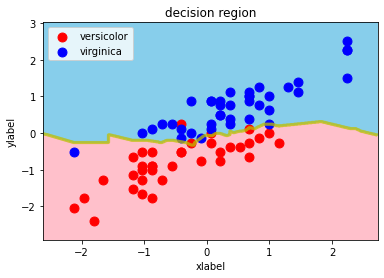

In [59]:
neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
decision_region(X_train, y_train, neigh)

In [60]:
#PROBLEM8
def learn(train_data, test_data, method, tp=None):
    X_train, y_train = train_data[:, :2], train_data[:, 2] 
    X_test, y_test = test_data[:, :2], test_data[:, 2] 

    method.fit(X_train, y_train)
    y_pred = method.predict(X_test)

    return X_train, y_train

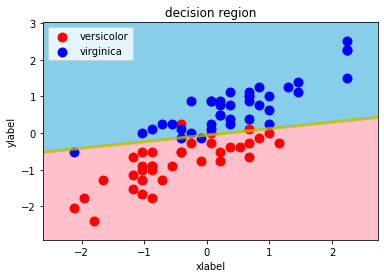

In [61]:
y = np.array([train[:, 2]])
y = y.reshape(y.shape[1], 1)
train_data = np.hstack((X_train, y))

y = np.array([test[:, 2]])
y = y.reshape(y.shape[1], 1)
test_data = np.hstack((X_test, y))

clf = LogisticRegression(random_state=0)
xt, yt = learn(train_data, test_data, clf)
decision_region(xt, yt, clf)

Confusion matrix:
[[13  1]
 [ 0 11]]


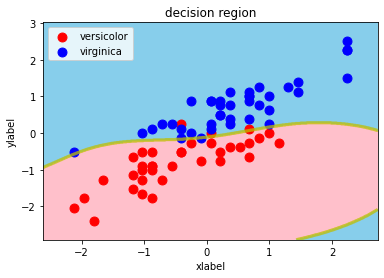

In [70]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
xt, yt = learn(train_data, test_data, clf)
decision_region(xt, yt, clf)

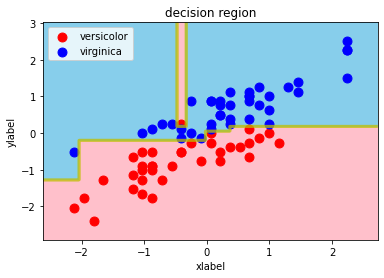

In [63]:
clf = DecisionTreeClassifier(random_state=0)
xt, yt = learn(train_data, test_data, clf)
decision_region(xt, yt, clf)

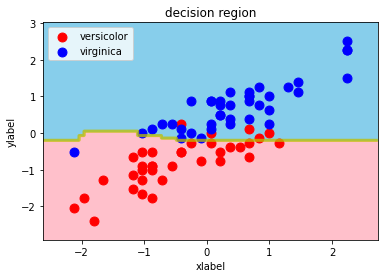

In [64]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
xt, yt = learn(train_data, test_data, clf)
decision_region(xt, yt, clf)

In [65]:
#PROBLEM9
def learn(train_data, test_data, method, tp=None):
    X_train, y_train = train_data[:, :2], train_data[:, 2] 
    X_test, y_test = test_data[:, :2], test_data[:, 2] 

    method.fit(X_train, y_train)
    y_pred = method.predict(X_test)

    print("Confusion matrix:\n{}".format(confusion_matrix(y_test, y_pred)))

    return X_train, y_train

In [71]:
train, test = train_test_split(new_df.to_numpy())

Confusion matrix:
[[12  2]
 [ 0 11]]


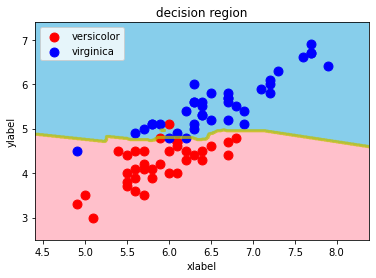

In [74]:
clf = KNeighborsClassifier(n_neighbors=3)
xt, yt = learn(train, test, clf)
decision_region(xt, yt, clf)

Confusion matrix:
[[11  3]
 [ 0 11]]


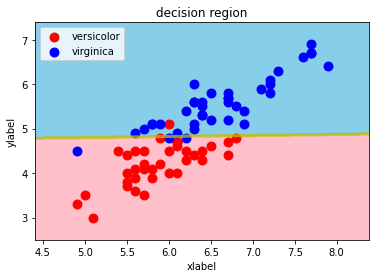

In [73]:
clf = LogisticRegression(random_state=0)
xt, yt = learn(train, test, clf)
decision_region(xt, yt, clf)

Confusion matrix:
[[11  3]
 [ 0 11]]


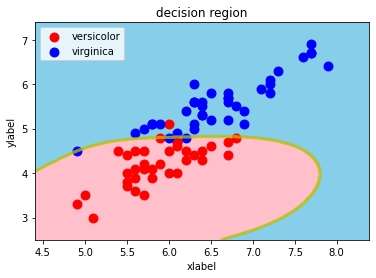

In [72]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
xt, yt = learn(train, test, clf)
decision_region(xt, yt, clf)

Confusion matrix:
[[11  3]
 [ 1 10]]


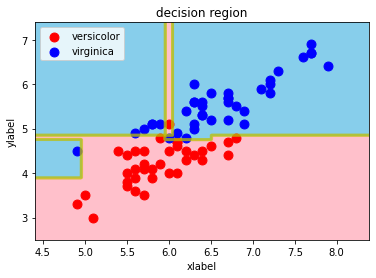

In [75]:
clf = DecisionTreeClassifier(random_state=0)
xt, yt = learn(train, test, clf)
decision_region(xt, yt, clf)

Confusion matrix:
[[11  3]
 [ 0 11]]


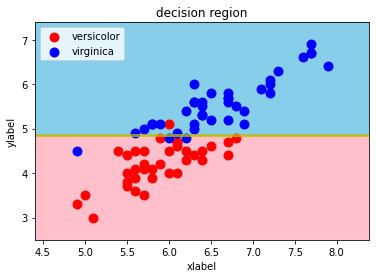

In [76]:
clf = DecisionTreeClassifier(max_depth=2, random_state=0)
xt, yt = learn(train, test, clf)
decision_region(xt, yt, clf)

Standardlization allows computer to train the model quickly and efficently.

In [77]:
#PROBLEM10
def decision_region_multi(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa', 'versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue', 'green']
    contourf_color = ['pink', 'skyblue', 'lightgreen']
    n_class = 3
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [81]:
data = df[['sepal_length', 'petal_length', 'Species']]
d_train, d_test = train_test_split(data.to_numpy())
scaler.fit(d_train[:,:-1])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [82]:
scaler.mean_

array([5.84196429, 3.68482143])

In [85]:
dx_train = scaler.transform(d_train[:, :-1])
dy_train = np.array([d_train[:, 2]])
dy_train = dy_train.reshape(dy_train.shape[1], 1)
train_data = np.hstack((dx_train, dy_train))

dx_test = scaler.transform(d_test[:, :-1])
dy_test = np.array([d_test[:, 2]])
dy_test = dy_test.reshape(dy_test.shape[1], 1)
test_data = np.hstack((dx_test, dy_test))

In [86]:
clf = KNeighborsClassifier(n_neighbors=3)
xt, yt = learn(train_data, test_data, clf, 'macro')

Confusion matrix:
[[ 8  0  0]
 [ 0 18  0]
 [ 0  5  7]]


In [87]:
xt, yt = learn(train_data, test_data, clf, 'micro')

Confusion matrix:
[[ 8  0  0]
 [ 0 18  0]
 [ 0  5  7]]


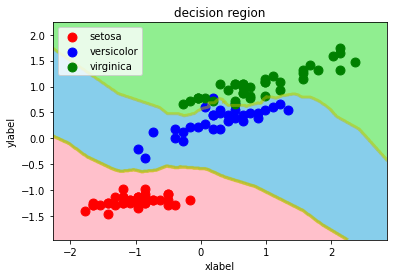

In [88]:
decision_region_multi(xt, yt, clf)

In [91]:
clf = LogisticRegression(random_state=0)
xt, yt = learn(train_data, test_data, clf, 'macro')

Confusion matrix:
[[ 8  0  0]
 [ 1 16  1]
 [ 0  3  9]]


In [92]:
xt, yt = learn(train_data, test_data, clf, 'micro')

Confusion matrix:
[[ 8  0  0]
 [ 1 16  1]
 [ 0  3  9]]


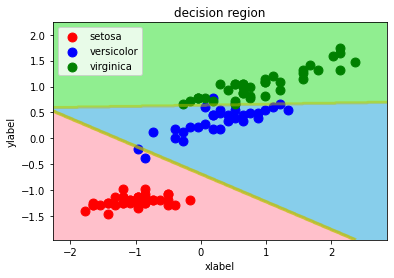

In [93]:
decision_region_multi(xt, yt, clf)

In [94]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
xt, yt = learn(train_data, test_data, clf, 'macro')

Confusion matrix:
[[ 8  0  0]
 [ 0 18  0]
 [ 0  3  9]]


In [95]:
xt, yt = learn(train_data, test_data, clf, 'micro')

Confusion matrix:
[[ 8  0  0]
 [ 0 18  0]
 [ 0  3  9]]


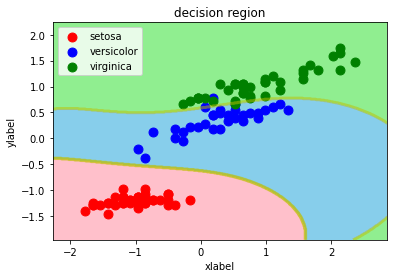

In [96]:
decision_region_multi(xt, yt, clf)

In [97]:
clf = DecisionTreeClassifier(random_state=0)
xt, yt = learn(train_data, test_data, clf, 'macro')

Confusion matrix:
[[ 8  0  0]
 [ 0 17  1]
 [ 0  4  8]]


In [98]:
xt, yt = learn(train_data, test_data, clf, 'micro')

Confusion matrix:
[[ 8  0  0]
 [ 0 17  1]
 [ 0  4  8]]


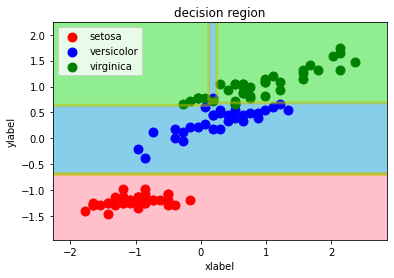

In [99]:
decision_region_multi(xt, yt, clf)

In [104]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
xt, yt = learn(train_data, test_data, clf, 'macro')

Confusion matrix:
[[ 8  0  0]
 [ 0 17  1]
 [ 0  4  8]]


In [103]:
xt, yt = learn(train_data, test_data, clf, 'micro')

Confusion matrix:
[[ 8  0  0]
 [ 0 17  1]
 [ 0  4  8]]


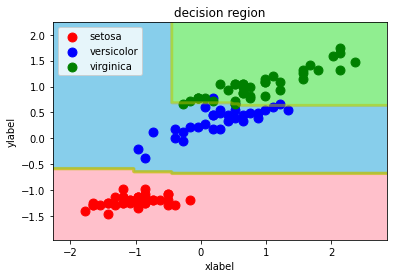

In [102]:
decision_region_multi(xt, yt, clf)